## NAME- Joel Alex Chandy
## Dse-B
## Reg No- 220968408


## Importing libraries and Datasets

In [1]:
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.losses import binary_crossentropy,categorical_crossentropy
from tensorflow.keras.metrics import Accuracy,Precision

2025-04-30 18:58:08.580367: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-30 18:58:08.871026: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-30 18:58:08.978583: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-30 18:58:09.009041: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-30 18:58:09.234733: I tensorflow/core/platform/cpu_feature_guar

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import seaborn as sns


In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('iris.csv')

In [5]:
df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df['Iris-setosa'].value_counts()

Iris-setosa
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: count, dtype: int64

In [7]:
df.isnull().any()


5.1            False
3.5            False
1.4            False
0.2            False
Iris-setosa    False
dtype: bool

In [8]:
X=df.drop('Iris-setosa',axis=1)
y=df['Iris-setosa']

In [9]:
X

,5.1,3.5,1.4,0.2
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4
...,...,...,...,...
144,6.7,3.0,5.2,2.3
145,6.3,2.5,5.0,1.9
146,6.5,3.0,5.2,2.0
147,6.2,3.4,5.4,2.3


## Preprocesssing

In [10]:
le=LabelEncoder()
y=le.fit_transform(y)


In [11]:
ss=StandardScaler()
ss.fit(X)
X=ss.transform(X)

In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)



In [51]:
X_train

array([[-1.14939788, -1.49805471, -0.2910135 , -0.29687647],
       [ 0.67981015,  0.13207907,  0.96876299,  0.76751006],
       [ 0.07007414,  0.36495532,  0.56792502,  0.76751006],
       [ 0.55786294,  0.59783158,  0.51066245,  0.50141343],
       [ 0.67981015, -0.56654969,  1.02602556,  1.29970333],
       [-1.27134508,  0.13207907, -1.26447715, -1.361263  ],
       [ 1.04565175,  0.59783158,  1.08328813,  1.16665501],
       [-0.78355627,  1.06358409, -1.32173972, -1.361263  ],
       [ 0.67981015, -0.56654969,  1.02602556,  1.16665501],
       [ 1.65538776, -0.10079718,  1.1405507 ,  0.50141343],
       [ 1.04565175, -0.10079718,  0.79697529,  1.43275165],
       [ 0.67981015, -0.79942595,  0.85423786,  0.90055838],
       [ 1.53344056, -0.10079718,  1.19781326,  1.16665501],
       [-0.90550348,  1.76221285, -1.26447715, -1.361263  ],
       [-0.53966187,  0.83070783, -1.32173972, -1.09516636],
       [-0.90550348,  0.59783158, -1.20721458, -0.96211805],
       [-0.53966187,  1.

In [52]:
model = Sequential([
    Input(shape=(4,)),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])


In [53]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

In [54]:
X.shape

(149, 4)

In [55]:
model.compile(
    optimizer=Adam(learning_rate=0.1),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [56]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [57]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [60]:
his=model.fit(x=X_train,
         y=y_train,epochs=100,batch_size=32,validation_split=0.1)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 3.0800e-05 - val_accuracy: 0.8571 - val_loss: 0.3917
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 2.3308e-05 - val_accuracy: 0.8571 - val_loss: 0.3920
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 3.2637e-05 - val_accuracy: 0.8571 - val_loss: 0.3909
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 2.4701e-05 - val_accuracy: 0.8571 - val_loss: 0.3898
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 2.7558e-05 - val_accuracy: 0.8571 - val_loss: 0.3894
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 2.4990e-05 - val_accuracy: 0.8571 - val_loss: 0.3886
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 2.6279e-05 - val_accuracy: 0.8571 - val_loss: 0.3894
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 3.1085e-05 - 

In [59]:
loss, accuracy=model.evaluate(x=X_test,
              y=y_test,batch_size=32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step - accuracy: 0.8667 - loss: 1.5914


In [22]:
import matplotlib.pyplot as plt

In [23]:
train_loss,train_acc,val_loss,val_acc=his.history.values()

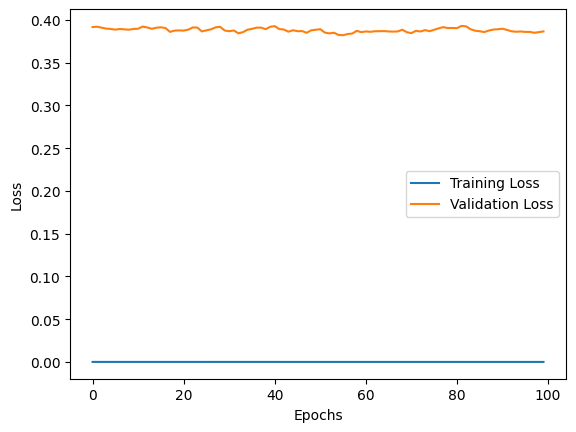

In [70]:
plt.plot(his.history['loss'],label='Training Loss')
plt.plot(his.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [72]:
from sklearn.metrics import classification_report,confusion_matrix

In [73]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0])

In [74]:
import numpy as np
y_pred = np.argmax(model.predict(X_test), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


In [75]:
y_pred

array([2, 0, 2, 1, 2, 0, 2, 2, 1, 2, 2, 0, 0, 0, 0])

In [76]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Classification report

In [77]:
cr=classification_report(y_test,y_pred,target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

In [78]:
print(cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       1.00      0.33      0.50         6
 Iris-virginica       0.43      1.00      0.60         3

       accuracy                           0.73        15
      macro avg       0.81      0.78      0.70        15
   weighted avg       0.89      0.73      0.72        15



<Axes: >

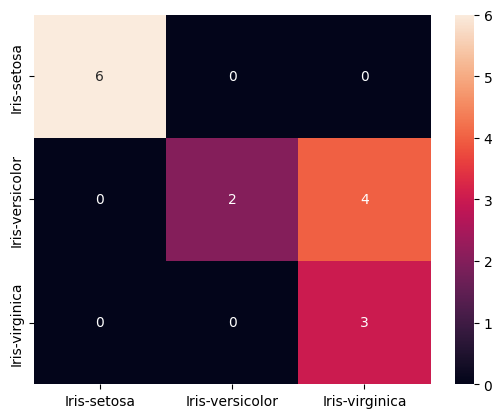

In [79]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

## Interpretation
### Accuracy of the model 86%
### Over fitting was Observed

## Classifcation Report Summary
### 2 instance of misclassification of versicolor observed
### less number of instance of virginica present as compared to other 2 was observed
